In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size':22})

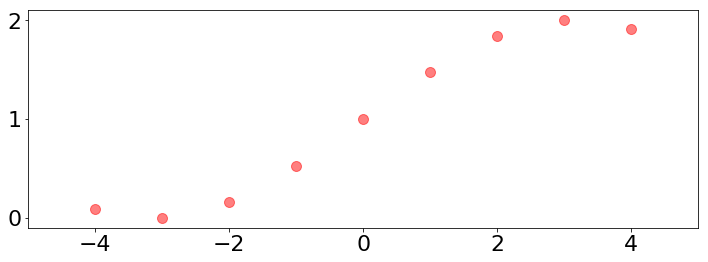

In [12]:
k = 5
x = np.arange(-k+1, k)
y = np.sin(x/2.) + 1.
width = 12
height = 4
size = (width,height)
plt.figure(figsize=size)
plt.plot(x, y, 'or', markersize=10, alpha=0.5)
plt.axis((-k, k, -0.1, 2.1));

In [13]:
def interpolation_piecewise_constant(x, y, xx):
    """
    From samples (x,y) generate piecewise constant function sampled at points xx
    """
    diff = np.abs(x.reshape(1,-1) - xx.reshape(-1,1))
    closest = np.argmin(diff, axis=1)
    
    return y[closest]
    

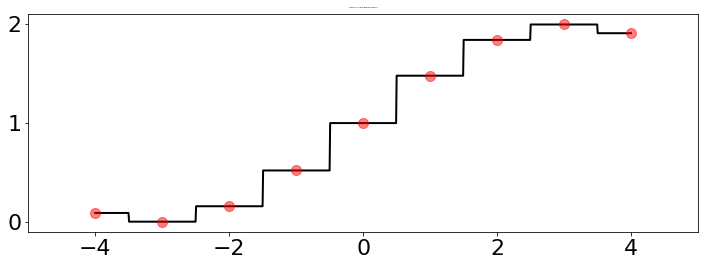

In [19]:
xx = np.linspace(-k+1, k-1, 1000)
yy = interpolation_piecewise_constant(x, y, xx);
plt.figure(figsize=size);
plt.plot(xx, yy, '-k', lw=2)
plt.plot(x, y, 'or', markersize=10, alpha=0.5)
plt.axis((-k, k, -0.1, 2.1))
plt.title('Piece-contant approximation', fontsize=2);

In [15]:
def interpolation_piecewise_linear(x, y, xx, fd='centered'):
    """From samples (x, y) generate piecewise-linear function sampled at points xx using finite difference slopes"""
    diff = np.abs(x.reshape(1, -1) - xx.reshape(-1, 1))
    closest = np.argmin(diff, axis=1)
    
    sigma = np.zeros_like(y)
    if fd == 'centered':
        sigma[1:-1] = (y[2:] - y[:-2] / (x[2:]-x[:-2]))
    if fd == 'forward':
        sigma[:-1] = XXX
    if fd == 'backward':
        sigma[1:] = XXX
    return y[closest] + sigma[closest]*(xx-x[closest])

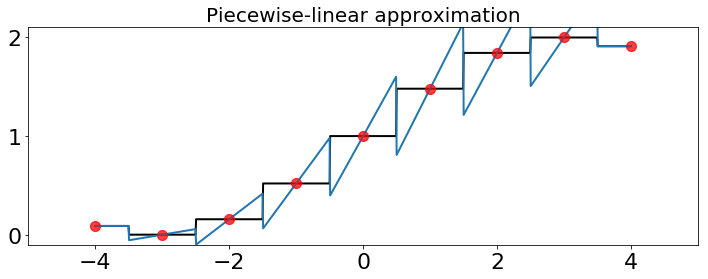

In [16]:
xx = np.linspace(-k+1, k-1, 1000)
yy = interpolation_piecewise_constant(x, y, xx)
plt.figure(figsize=size)
plt.plot(xx, yy, '-k', lw=2)
plt.plot(x, y, 'or', markersize=10, alpha=0.5)
xx = np.linspace(-k+1, k-1, 1000)
yy = interpolation_piecewise_linear(x, y, xx)
plt.plot(xx, yy, '-', lw=2)
plt.plot(x, y, 'or', markersize=10, alpha=0.5)
plt.axis((-k, k, -0.1, 2.1))
plt.title('Piecewise-linear approximation', fontsize=20);

In [8]:
def pw_minmod(x, y , xx):
    """ From samples (x,y) generate piecewise linear function sampled at 
    points xx using Minmod slope limiter"""
    
    diff = np.abs(x.reshape(1, -1) - xx.reshape(-1, 1))
    closest = np.argmin(diff, axis=1)
    
    forward = np.zeros_like(y)
    backward = np.zeros_like(y)
    sigma = np.zeros_like(y)
    
    forward[:-1] = (y[1:] - y[:-1] / (x[1:]-x[:-1]))
    backward[1:] = (y[1:] - y[:-1] / (x[1:]-x[:-1]))
    
    sigma = (np.sign(forward) + np.sign(backward))/2. \
    * np.minimum(np.abs(forward), np.abs(backward))
    
    return y[closest] + sigma[closest]*(xx-x[closest])
    

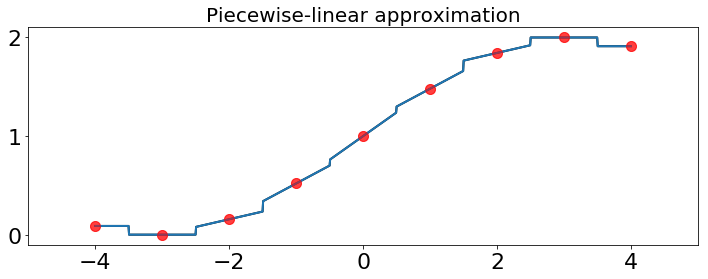

In [9]:
xx = np.linspace(-k+1, k-1, 1000)
yy = pw_minmod(x, y, xx)
plt.figure(figsize=size)
plt.plot(xx, yy, '-k', lw=2)
plt.plot(x, y, 'or', markersize=10, alpha=0.5)
xx = np.linspace(-k+1, k-1, 1000)
yy = pw_minmod(x, y, xx)
plt.plot(xx, yy, '-', lw=2)
plt.plot(x, y, 'or', markersize=10, alpha=0.5)
plt.axis((-k, k, -0.1, 2.1))
plt.title('Piecewise-linear approximation', fontsize=20);

In [12]:
# xx = x + 0.5
# diff = np.abs(x.reshape(1,-1) - xx.reshape(-1,1))

In [13]:
# diff

array([[ 0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5],
       [ 1.5,  0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5],
       [ 2.5,  1.5,  0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5],
       [ 3.5,  2.5,  1.5,  0.5,  0.5,  1.5,  2.5,  3.5,  4.5],
       [ 4.5,  3.5,  2.5,  1.5,  0.5,  0.5,  1.5,  2.5,  3.5],
       [ 5.5,  4.5,  3.5,  2.5,  1.5,  0.5,  0.5,  1.5,  2.5],
       [ 6.5,  5.5,  4.5,  3.5,  2.5,  1.5,  0.5,  0.5,  1.5],
       [ 7.5,  6.5,  5.5,  4.5,  3.5,  2.5,  1.5,  0.5,  0.5],
       [ 8.5,  7.5,  6.5,  5.5,  4.5,  3.5,  2.5,  1.5,  0.5]])

In [10]:
# x.reshape(1,-1)

array([[-4, -3, -2, -1,  0,  1,  2,  3,  4]])

In [11]:
# x.reshape(-1,1)

array([[-4],
       [-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4]])